#                      Highest grossing Movie Portfolio Project

In this Movie Portfolio Project, We are looking at correlation between columns in the movie dataset using various plots and functions available in Python(Matplotlib, Pandas, Numpy, seaborn)


In [1]:
#importing required packages:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt
from matplotlib import mlab as mlab
from matplotlib.pyplot import figure


# reading in data:

df = pd.read_csv(r"E:\Portfolio Projects\Movies Correlation Project\movies.csv")

In [2]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [16]:
# looking for any missing data in the above dataframe:

for col in df.columns:
    nulldata = np.mean(df[col].isnull())
    print('{} = {}%'.format(col, nulldata))

name = 0.0%
rating = 0.0%
genre = 0.0%
year = 0.0%
released = 0.0%
score = 0.0%
votes = 0.0%
director = 0.0%
writer = 0.0%
star = 0.0%
country = 0.0%
budget = 0.0%
gross = 0.0%
company = 0.0%
runtime = 0.0%


In [4]:
df['budget'] = df['budget'].fillna('0')
df['gross'] = df['gross'].fillna('0')

In [5]:
# looking at the data types of all columns in our dataframe:

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget       object
gross        object
company      object
runtime     float64
dtype: object

In [10]:
#Budget and Gross is a big integer it should not be a float
#Changing data type of BUDGET and GROSS columns from float to int:

df['budget'] = df['budget'].astype('int64')
df['gross']  = df['gross'].astype('int64')


In [11]:
df = df.sort_values(by = ['gross'], inplace = False, ascending = False)

In [12]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,Walker,R,Biography,1987,"December 4, 1987 (United States)",6.6,3300.0,Alex Cox,Rudy Wurlitzer,Ed Harris,United States,5800000,0,In-Cine Compañía Industrial Cinematográfica,94.0
1199,Walk Like a Man,PG,Comedy,1987,"April 17, 1987 (United States)",4.8,1400.0,Melvin Frank,Robert Klane,Christopher Lloyd,United States,0,0,Metro-Goldwyn-Mayer (MGM),86.0
1192,White of the Eye,R,Horror,1987,"June 19, 1987 (United Kingdom)",6.2,2200.0,Donald Cammell,China Kong,David Keith,United Kingdom,0,0,Mrs. White's Productions,110.0
1184,Creepozoids,R,Horror,1987,"October 2, 1987 (United States)",4.0,2100.0,David DeCoteau,Dave Eisenstark,Linnea Quigley,United States,75000,0,Titan Productions,72.0


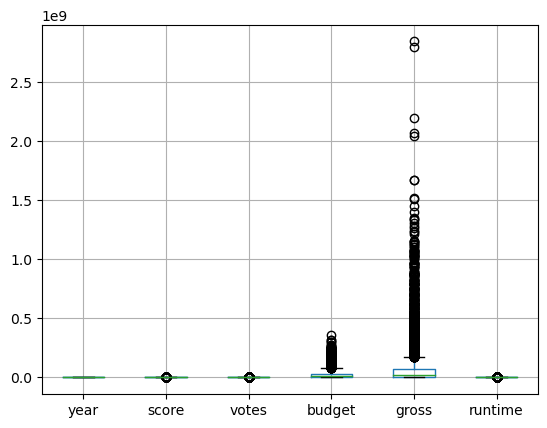

In [13]:
#Looking for Outliers:

df.boxplot()

plt.show()

In [14]:
# drop any Duplicates:

df= df.drop_duplicates().sort_values(by= ['gross'], ascending=False)
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,Fast Food,PG-13,Comedy,1989,"April 28, 1989 (United States)",4.5,653.0,Michael A. Simpson,Scott B. Sowers,Clark Brandon,United States,0,0,Double Helix Films,92.0
1629,River of Death,R,Action,1989,"September 29, 1989 (United States)",4.3,1100.0,Steve Carver,Alistair MacLean,Michael Dudikoff,United States,0,0,Breton Film Productions,107.0
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92.0
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85.0


In [15]:
# droping nulls data:
df = df.dropna().sort_values(by=['gross'], ascending=False)

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,Cherry 2000,PG-13,Action,1987,"February 5, 1988 (United States)",5.6,9100.0,Steve De Jarnatt,Lloyd Fonvielle,Melanie Griffith,United States,10000000,0,Orion Pictures,99.0
944,Body Slam,PG,Comedy,1986,"May 21, 1987 (United States)",5.2,976.0,Hal Needham,Shel Lytton,Dirk Benedict,United States,0,0,Hemdale,92.0
632,Lovelines,R,Comedy,1984,"November 2, 1984 (United States)",5.3,241.0,Rod Amateau,Chip Hand,Greg Bradford,United States,0,0,Delphi II Productions,93.0
618,Kaos,R,Comedy,1984,"February 14, 1986 (United States)",7.9,2700.0,Paolo Taviani,Luigi Pirandello,Margarita Lozano,Italy,0,0,Filmtre,187.0


##  Q: what impacts grossing of a movie?




#####  C1: let's look at correlation between BUDGET and GROSS

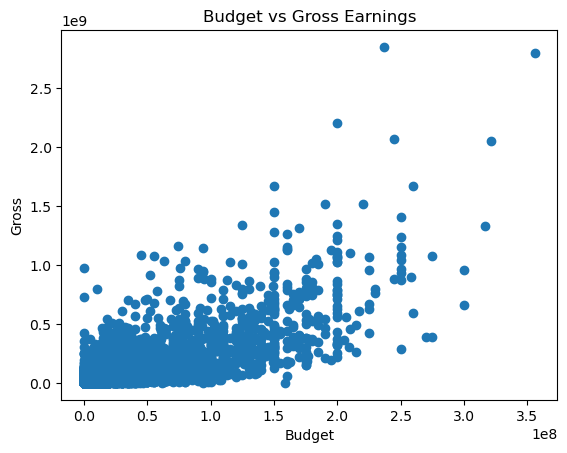

In [17]:
#looking correlation between BUDGET and GROSS:
# Using SCATTERPLOT to correlate BUDGET and GROSS (BUDGET vs GROSS)


plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross')

plt.show()

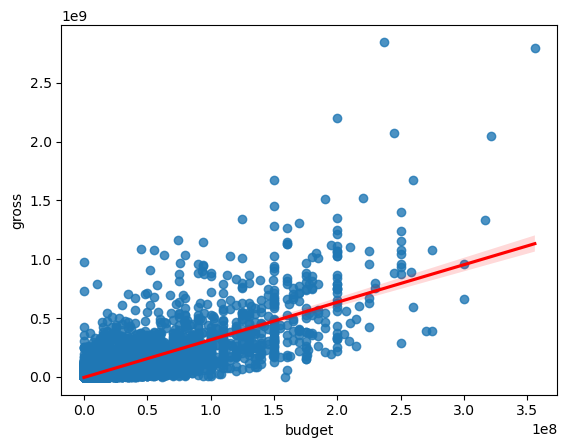

In [18]:
# Using seaborn for BUDGET vs GROSS


sns.regplot(x='budget', y='gross', data=df ,line_kws={"color":"red"})
plt.show()

###### From the above plots, we can see that there is high POSITIVE correlation between BUDGET and GROSS

####  C2: Correlation Between Score and Gross

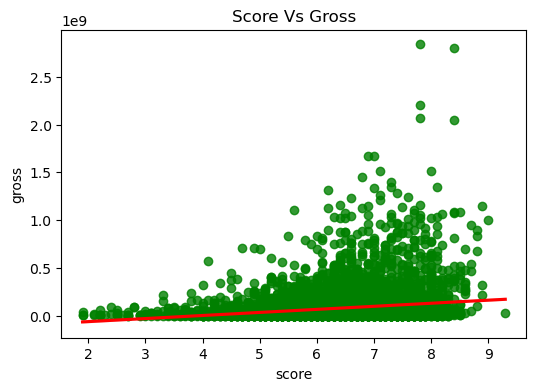

In [20]:
#plotting between Score Vs Gross:

sns.regplot(x='score', y='gross', data=df, scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.title('Score Vs Gross')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (6, 4)
plt.show()

###### Score has very less Positive correlation with Gross

In [21]:
# Looking at different correlation:
#different correlations methods: (pearson, kendall and spearman)
df.corr(method='pearson', numeric_only=True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.102346,0.226895,0.314842,0.264716,0.120676
score,0.102346,1.000000,0.411931,0.056781,0.188259,0.400574
votes,0.226895,0.411931,1.000000,0.485301,0.632987,0.309366
budget,0.314842,0.056781,0.485301,1.000000,0.750562,0.270042
gross,0.264716,0.188259,0.632987,0.750562,1.000000,0.244942
runtime,0.120676,0.400574,0.309366,0.270042,0.244942,1.000000


In [22]:
df.corr(method='kendall',numeric_only=True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.070606,0.339302,0.214967,0.221815,0.096862
score,0.070606,1.000000,0.304058,-0.004328,0.092645,0.284159
votes,0.339302,0.304058,1.000000,0.436356,0.559387,0.198342
budget,0.214967,-0.004328,0.436356,1.000000,0.540686,0.177497
gross,0.221815,0.092645,0.559387,0.540686,1.000000,0.176394
runtime,0.096862,0.284159,0.198342,0.177497,0.176394,1.000000


In [23]:
df.corr(method='spearman', numeric_only=True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.103391,0.482954,0.299861,0.323070,0.142587
score,0.103391,1.000000,0.433536,-0.006236,0.135554,0.400655
votes,0.482954,0.433536,1.000000,0.600785,0.752534,0.290511
budget,0.299861,-0.006236,0.600785,1.000000,0.716102,0.249102
gross,0.323070,0.135554,0.752534,0.716102,1.000000,0.256151
runtime,0.142587,0.400655,0.290511,0.249102,0.256151,1.000000


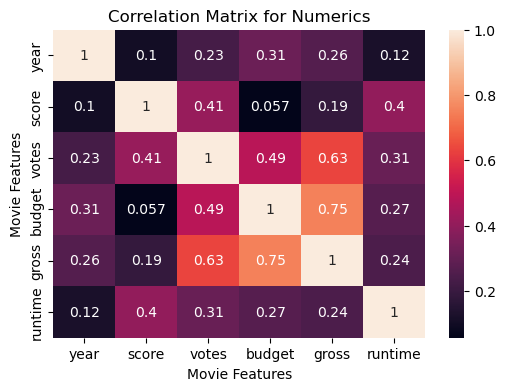

In [24]:
#Using Seaborn again to see above correlation in a HeatMap:

corr_matrix = df.corr(method='pearson', numeric_only=True)
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix for Numerics')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

#### C3: Companies and their Gross Earnings 

In [22]:
#looking at Top 10 highest grossing company of all time: 

companygross = df.groupby(['company'])[['gross']].sum()
companygross_sorted = companygross.sort_values(['gross', 'company'], ascending= False)[:10]
companygross_sorted = companygross_sorted['gross'].astype('int64')
companygross_sorted

company
Warner Bros.             56329179122
Universal Pictures       52514188890
Columbia Pictures        43008941346
Paramount Pictures       40493607415
Twentieth Century Fox    40257053857
Walt Disney Pictures     36327887792
New Line Cinema          19867862616
Marvel Studios           15065592411
DreamWorks Animation     11873612858
Touchstone Pictures      11795832638
Name: gross, dtype: int64

In [23]:
#looking at top highest grossing company based on year:

companygross_yr = df.groupby(['company','year'])[['gross']].sum()
companygross_yr_sorted = companygross_yr.sort_values(['gross', 'year', 'company'], ascending= False)[:10]
companygross_yr_sorted = companygross_yr_sorted['gross'].astype('int64')
companygross_yr_sorted

company                year
Walt Disney Pictures   2019    5773131804
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3565705182
Warner Bros.           2010    3300479986
                       2011    3223799224
Walt Disney Pictures   2010    3104474158
Paramount Pictures     2014    3071298586
Name: gross, dtype: int64

#####  Bigger Company makes BIG BUCKS

#### C4: Rating and Gross earning :

In [25]:
# looking at rating of films and their gross earning:

ratinggross = df.groupby(['rating'])[['gross']].sum()
ratinggross_sorted = ratinggross.sort_values(['gross','rating'], ascending=False)

ratinggross_sorted

,gross
rating,
PG-13,273625422167
R,154147278730
PG,130067777683
G,21590586882
Not Rated,4605193215
TV-MA,712537041
TV-PG,360749260
NC-17,247554585
Unrated,75332551


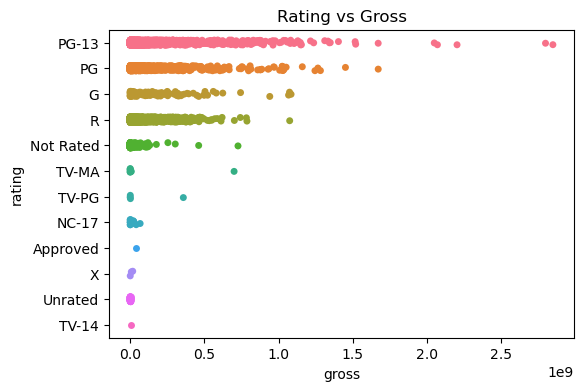

In [26]:
sns.stripplot(x='gross', y='rating', data=df, hue='rating', legend=False)
plt.title('Rating vs Gross')
plt.show()

In [29]:
df_numerize = df

for col in df_numerize.columns:
    if (df_numerize[col].dtype == 'object'):
        df_numerize[col] = df_numerize[col].astype('category')  
        df_numerize[col] = df_numerize[col].cat.codes
        
df_numerize

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,527,5,0,2009,688,7.8,1100000.0,1137,1756,2283,55,237000000,2847246203,2208,162.0
7445,529,5,0,2019,180,8.4,903000.0,160,729,2192,55,356000000,2797501328,1571,181.0
3045,6811,5,6,1997,696,7.8,1100000.0,1137,1756,1560,55,200000000,2201647264,2208,194.0
6663,5075,5,0,2015,690,7.8,876000.0,1107,2518,508,55,245000000,2069521700,1505,138.0
7244,530,5,0,2018,189,8.4,897000.0,160,729,2192,55,321000000,2048359754,1571,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,1144,5,0,1987,1061,5.6,9100.0,2586,2587,1788,55,10000000,0,1736,99.0
944,862,4,4,1986,2329,5.2,976.0,1024,3880,640,55,0,0,1225,92.0
632,3324,6,4,1984,2593,5.3,241.0,2368,670,900,55,0,0,812,93.0
618,2975,6,4,1984,921,7.9,2700.0,2064,2635,1687,25,0,0,1043,187.0


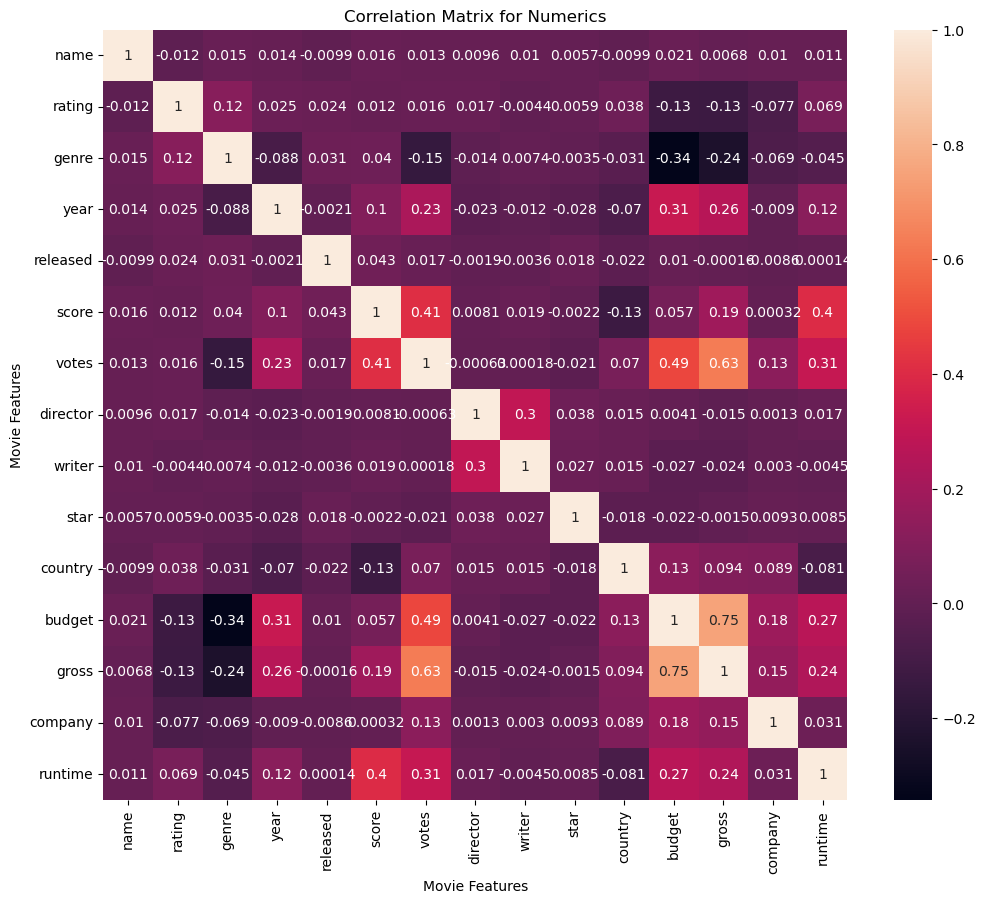

In [32]:
#Using Seaborn again to see above correlation in a HeatMap:

corr_matrix = df_numerize.corr(method='pearson')
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix for Numerics')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 10)

plt.show()

In [33]:
df_numerize.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.011924,0.015300,0.013514,-0.009906,0.016181,0.013180,0.009608,0.010217,0.005685,-0.009939,0.020825,0.006817,0.010073,0.011151
rating,-0.011924,1.000000,0.117566,0.024989,0.024319,0.011538,0.016086,0.017205,-0.004387,0.005905,0.037738,-0.126806,-0.128910,-0.076807,0.069089
genre,0.015300,0.117566,1.000000,-0.088172,0.030625,0.040090,-0.148420,-0.013508,0.007351,-0.003525,-0.031485,-0.342064,-0.240903,-0.068678,-0.044631
year,0.013514,0.024989,-0.088172,1.000000,-0.002088,0.102346,0.226895,-0.022765,-0.012318,-0.027691,-0.070266,0.314842,0.264716,-0.009026,0.120676
released,-0.009906,0.024319,0.030625,-0.002088,1.000000,0.043175,0.016877,-0.001868,-0.003569,0.018026,-0.022109,0.009995,-0.000164,-0.008570,0.000145
score,0.016181,0.011538,0.040090,0.102346,0.043175,1.000000,0.411931,0.008071,0.019084,-0.002193,-0.130094,0.056781,0.188259,0.000316,0.400574
votes,0.013180,0.016086,-0.148420,0.226895,0.016877,0.411931,1.000000,-0.000627,0.000177,-0.020977,0.069582,0.485301,0.632987,0.129596,0.309366
director,0.009608,0.017205,-0.013508,-0.022765,-0.001868,0.008071,-0.000627,1.000000,0.297479,0.037570,0.015245,0.004140,-0.015027,0.001337,0.017386
writer,0.010217,-0.004387,0.007351,-0.012318,-0.003569,0.019084,0.000177,0.297479,1.000000,0.026584,0.014937,-0.027145,-0.023834,0.003035,-0.004526
star,0.005685,0.005905,-0.003525,-0.027691,0.018026,-0.002193,-0.020977,0.037570,0.026584,1.000000,-0.017626,-0.021930,-0.001470,0.009317,0.008474


In [34]:
corr_mat = df_numerize.corr()

corr_pairs = corr_mat.unstack()

corr_pairs

name     name        1.000000
         rating     -0.011924
         genre       0.015300
         year        0.013514
         released   -0.009906
                       ...   
runtime  country    -0.081464
         budget      0.270042
         gross       0.244942
         company     0.030941
         runtime     1.000000
Length: 225, dtype: float64

In [35]:
#Correlation Matrix in a linear listing:

sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre    budget    -0.342064
budget   genre     -0.342064
genre    gross     -0.240903
gross    genre     -0.240903
genre    votes     -0.148420
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [40]:
higher_corr = sorted_pairs[(sorted_pairs)>0.4]

higher_corr

runtime   score       0.400574
score     runtime     0.400574
          votes       0.411931
votes     score       0.411931
budget    votes       0.485301
votes     budget      0.485301
gross     votes       0.632987
votes     gross       0.632987
budget    gross       0.750562
gross     budget      0.750562
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

## Conclusion: 

### From above correlations we come to following Conclusions:

#####  Budget, Votes from people have high impact on Gross earning for a Movie. 

##### Bigger company markes huge grossing movies more often 

#####  Rating of a movies also impacts its Earnings

#####  Score, Runtime, Year released has less impact on Gross Earnings